# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [2]:
# Instalação de bibliotecas básicas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from IPython.display import HTML, display


## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [3]:
# Responda aqui a primeira etapa

df = pd.read_csv("matches.csv")
print("Primeiras linhas do dataframe:")
print(df.head())
print("\nShape do dataframe:")
print(df.shape)
print("\nTipos de dados das colunas:")
print(df.dtypes)
print("\nDados ausentes por coluna:")
print(df.isnull().sum())
print("\nEstatísticas descritivas:")
print(df.describe())


Primeiras linhas do dataframe:
   Unnamed: 0        date   time            comp        round  day venue   
0           1  2021-08-15  16:30  Premier League  Matchweek 1  Sun  Away  \
1           2  2021-08-21  15:00  Premier League  Matchweek 2  Sat  Home   
2           3  2021-08-28  12:30  Premier League  Matchweek 3  Sat  Home   
3           4  2021-09-11  15:00  Premier League  Matchweek 4  Sat  Away   
4           6  2021-09-18  15:00  Premier League  Matchweek 5  Sat  Home   

  result   gf   ga  ...  match report  notes    sh   sot  dist   fk   pk   
0      L  0.0  1.0  ...  Match Report    NaN  18.0   4.0  16.9  1.0  0.0  \
1      W  5.0  0.0  ...  Match Report    NaN  16.0   4.0  17.3  1.0  0.0   
2      W  5.0  0.0  ...  Match Report    NaN  25.0  10.0  14.3  0.0  0.0   
3      W  1.0  0.0  ...  Match Report    NaN  25.0   8.0  14.0  0.0  0.0   
4      D  0.0  0.0  ...  Match Report    NaN  16.0   1.0  15.7  1.0  0.0   

  pkatt season             team  
0   0.0   2022  Manch

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

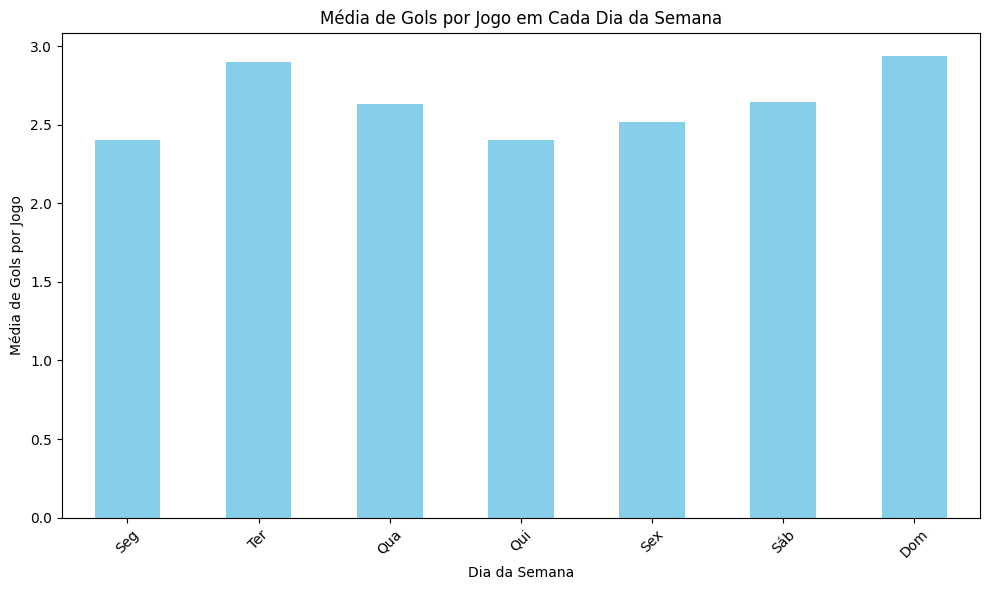

In [16]:
mapeamento_dias = {
    'Mon': 'Seg',
    'Tue': 'Ter',
    'Wed': 'Qua',
    'Thu': 'Qui',
    'Fri': 'Sex',
    'Sat': 'Sáb',
    'Sun': 'Dom'
}

df['dia'] = df['day'].map(mapeamento_dias)

df['total_goals'] = df['gf'] + df['ga']



gols_por_dia = df.groupby('dia')['total_goals'].sum()
jogos_por_dia = df['dia'].value_counts()

# Equalizar a diferença dividindo o total de gols pelo número de jogos
media_gols_por_dia = gols_por_dia / jogos_por_dia

# Ordenar os dias da semana
ordem_dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
media_gols_por_dia = media_gols_por_dia.reindex(ordem_dias)

plt.figure(figsize=(10, 6))
media_gols_por_dia.plot(kind='bar', color='skyblue')
plt.title('Média de Gols por Jogo em Cada Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Gols por Jogo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

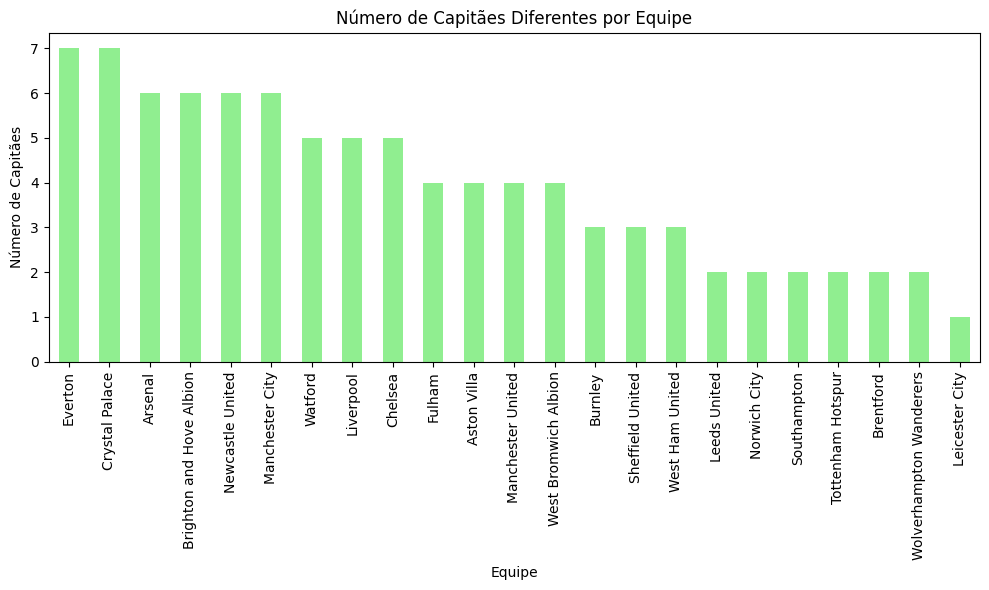

In [17]:
# Responda a etapa aqui

capitaes_por_equipe  = df.groupby('team')['captain'].nunique()

# Ordenar por quantidade de capitães
capitaes_por_equipe  = capitaes_por_equipe.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
capitaes_por_equipe.plot(kind='bar', color='lightgreen')
plt.title('Número de Capitães Diferentes por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Número de Capitães')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

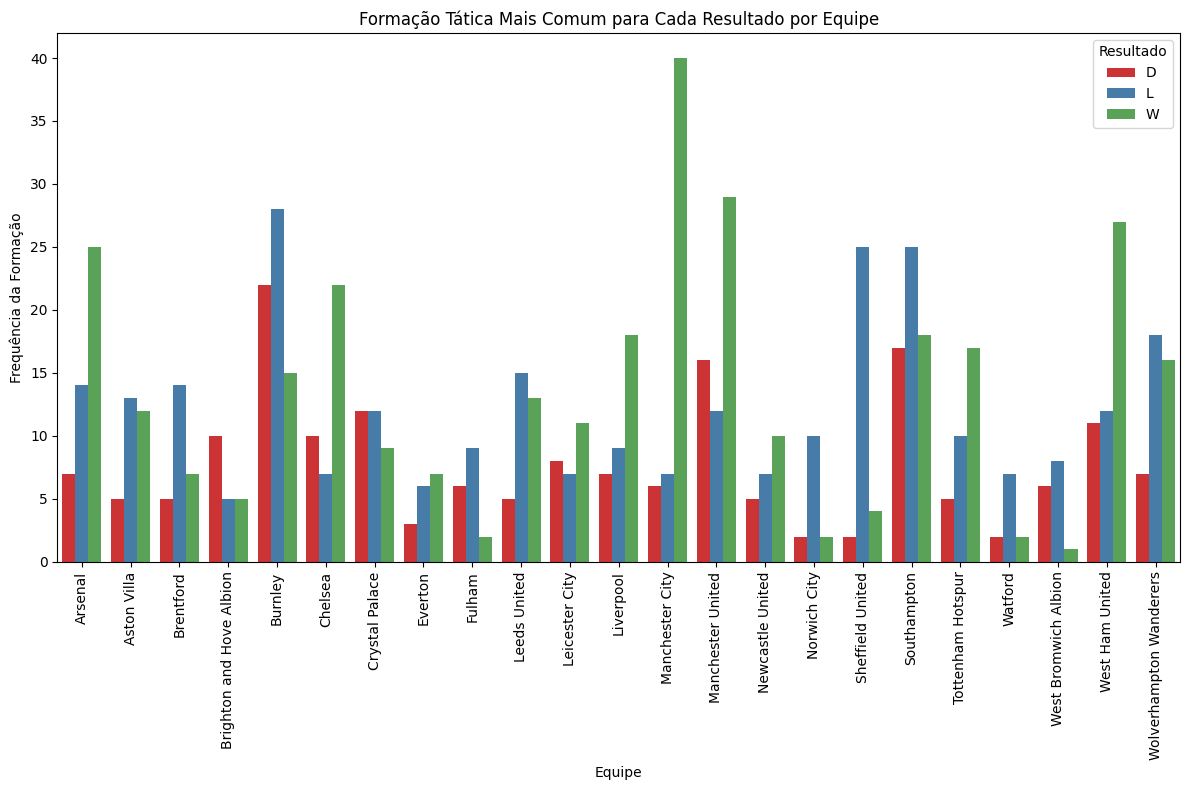

In [18]:
# Responda a etapa aqui
formacao_por_resultado = df.groupby(['team', 'result', 'formation']).size().reset_index(name='count')
formacoes_mais_comuns = formacao_por_resultado.loc[formacao_por_resultado.groupby(['team', 'result'])['count'].idxmax()]
formacoes_mais_comuns = formacoes_mais_comuns.sort_values(by=['team', 'result'])

plt.figure(figsize=(12, 8))
sns.barplot(x='team', y='count', hue='result', data=formacoes_mais_comuns, palette='Set1')
plt.title('Formação Tática Mais Comum para Cada Resultado por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Frequência da Formação')
plt.xticks(rotation=90)
plt.legend(title='Resultado', loc='upper right')
plt.tight_layout()
plt.show()

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

C:\Users\Kaue\AppData\Local\Temp\ipykernel_4768\3706153119.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='poss', data=media_posse_derrotas , palette='Blues_d')


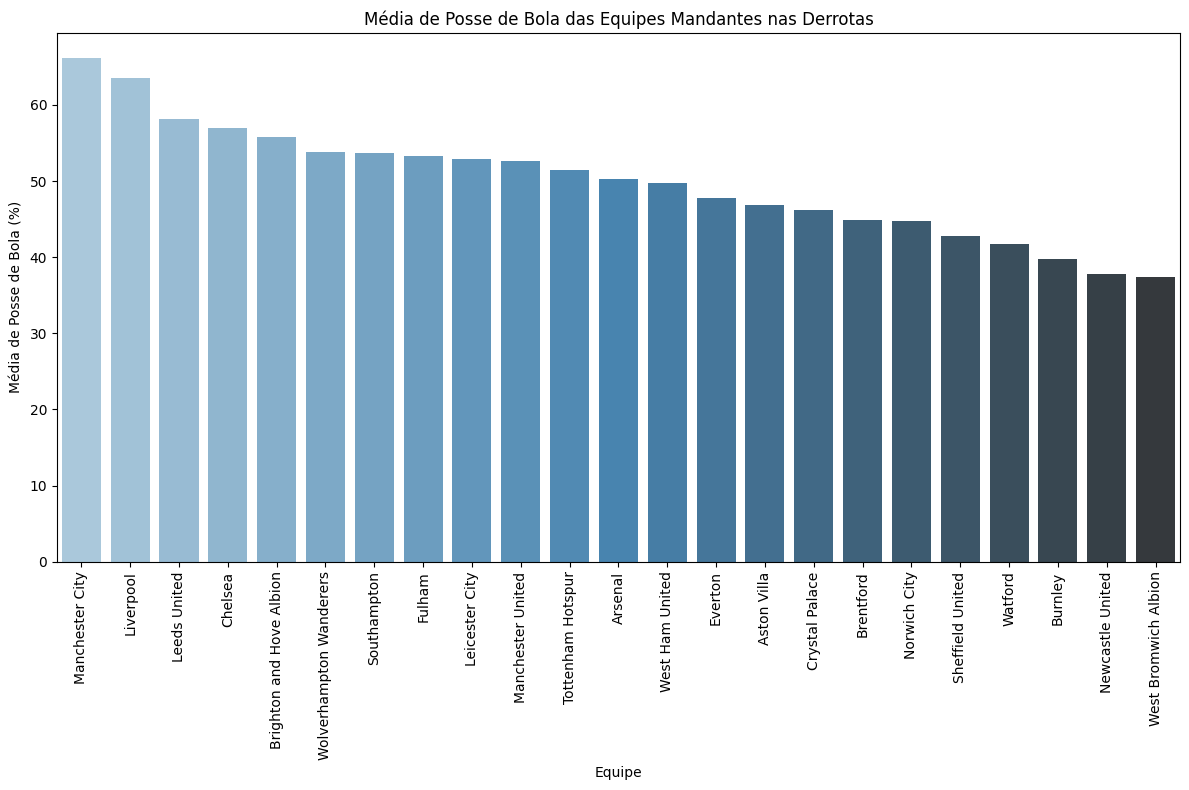

In [19]:
# Responda aqui a etapa
derrotas_em_casa = df[(df['venue'] == 'Home') & (df['result'] == 'L')]
media_posse_derrotas  = derrotas_em_casa.groupby('team')['poss'].mean().reset_index()
media_posse_derrotas  = media_posse_derrotas .sort_values(by='poss', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='team', y='poss', data=media_posse_derrotas , palette='Blues_d')
plt.title('Média de Posse de Bola das Equipes Mandantes nas Derrotas')
plt.xlabel('Equipe')
plt.ylabel('Média de Posse de Bola (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [21]:

def calcular_pontos(row):
    if row['result'] == 'W':
        return 3
    elif row['result'] == 'D':
        return 1
    else:
        return 0

df['points'] = df.apply(calcular_pontos, axis=1)

pontos_por_equipe  = df.groupby('team')['points'].sum().reset_index()
pontos_por_equipe  = pontos_por_equipe .sort_values(by='points', ascending=False).reset_index(drop=True)
pontos_por_equipe ['position'] = pontos_por_equipe .index + 1
def get_team_logo_url(nome_equipe):
    base_url = "https://logodetimes.com/wp-content/uploads/"
    nome_equipe_formatado = nome_equipe.lower().replace(" ", "-")
    return f'{base_url}{nome_equipe_formatado}-football-club.png'
pontos_por_equipe ['logo_url'] = pontos_por_equipe ['team'].apply(get_team_logo_url)

html_table = """
<table border='1'>
    <tr>
        <th>Posição</th>
        <th>Time</th>
        <th>Logo</th>
        <th>Pontos</th>
    </tr>

"""
for index, row in pontos_por_equipe.iterrows():
    html_table += f"<tr><td>{row['position']}</td><td>{row['team']}</td>"
    html_table += f"<td><img src='{row['logo_url']}' alt='{row['team']}' width='50' height='50'></td>"
    html_table += f"<td>{row['points']}</td></tr>"
html_table += "</table>"

display(HTML(html_table))


Posição,Time,Logo,Pontos
1,Manchester City,,166
2,Chelsea,,132
3,Manchester United,,128
4,Arsenal,,121
5,Tottenham Hotspur,,120
6,West Ham United,,117
7,Leicester City,,108
8,Wolverhampton Wanderers,,94
9,Leeds United,,93
10,Aston Villa,,92
